In [11]:
import pandas as pd
# Load the dataset
df = pd.read_csv('CCPP_data.txt', delimiter='\t')

# Calculate the correlation coefficient matrix for the whole dataset
correlation_matrix = df.corr()

# Identify the variable that is most correlated with the target variable EP (assuming EP is the last column)
target_variable = 'EP'  # Assuming 'EP' is the name of the target variable column
most_correlated_variable = correlation_matrix.iloc[:-1][target_variable].abs().idxmax()
most_correlated_value = correlation_matrix.loc[most_correlated_variable, target_variable]

correlation_matrix, most_correlated_variable, most_correlated_value


(          AT         V        AP        RH        EP
 AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
 V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
 AP -0.507549 -0.413502  1.000000  0.099574  0.518429
 RH -0.542535 -0.312187  0.099574  1.000000  0.389794
 EP -0.948128 -0.869780  0.518429  0.389794  1.000000,
 'AT',
 -0.9481284704167616)

In [12]:
###The variable that is most correlated with the target variable EP (Electrical Power Output) is Ambient Temperature (AT), with a correlation coefficient of approximately -0.948. This strong negative correlation suggests that as the ambient temperature increases, the electrical power output tends to decrease significantly.

In [13]:
# Import necessary libraries for linear regression and statistical analysis
import statsmodels.api as sm

# Prepare the data
X = df[['AT']]  # Independent variable (Ambient Temperature)
y = df['EP']    # Dependent variable (Electrical Power Output)

# Add a constant to the independent variable to represent the intercept
X_with_intercept = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_with_intercept).fit()

# Get the coefficient estimate (β1) and the intercept (β0)
coefficient_estimate = model.params['AT']
intercept_estimate = model.params['const']

# Calculate the 95% confidence interval for the slope (β1)
confidence_interval = model.conf_int(alpha=0.05).loc['AT']

# Perform the t-test for the slope coefficient and check if it is significantly different from 0
p_value = model.t_test([0, 1]).pvalue

# Get the R-squared value
r_squared = model.rsquared

# Compile the results
results = {
    'coefficient_estimate': coefficient_estimate,
    'intercept_estimate': intercept_estimate,
    '95%_confidence_interval': confidence_interval,
    'p_value_for_slope': p_value,
    'r_squared': r_squared
}

results


{'coefficient_estimate': -2.1713199585177896,
 'intercept_estimate': 497.03411989276725,
 '95%_confidence_interval': 0   -2.18591
 1   -2.15673
 Name: AT, dtype: float64,
 'p_value_for_slope': array(0.),
 'r_squared': 0.8989475964148236}

Best model for 1 features: Features: ('AT',), R^2 Score: 0.8989475964148236
Best model for 2 features: Features: ('AT', 'RH'), R^2 Score: 0.9209480760095283
Best model for 3 features: Features: ('AT', 'V', 'RH'), R^2 Score: 0.928374821658302
Best model for 4 features: Features: ('AT', 'V', 'AP', 'RH'), R^2 Score: 0.9286960898122536


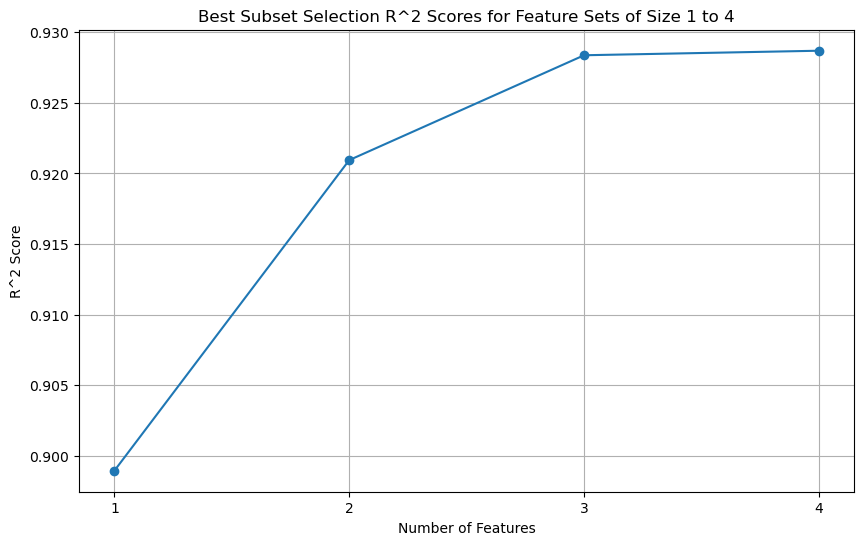

In [16]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is the DataFrame with the dataset loaded and 'EP' is the target variable
X = df.drop(columns='EP')  # Features
y = df['EP']               # Target variable

# Initialize dictionary to store the best model for each number of features
best_models = {}
r2_scores = []

# Try every possible combination of features from 1 to 4
for num_features in range(1, 5):
    best_r2 = -np.inf
    best_model = None
    for combo in combinations(X.columns, num_features):
        # Create a model with the given combination of features
        model = LinearRegression()
        model.fit(X[list(combo)], y)
        r2 = r2_score(y, model.predict(X[list(combo)]))
        
        # If the new model is better, update the best model for this number of features
        if r2 > best_r2:
            best_r2 = r2
            best_model = (combo, model)
    r2_scores.append(best_r2)
    best_models[num_features] = best_model

# Print the best models for each number of features
for num_features, (features, model) in best_models.items():
    print(f"Best model for {num_features} features: Features: {features}, R^2 Score: {r2_scores[num_features - 1]}")

# Plot the curve of R^2 versus the number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('Best Subset Selection R^2 Scores for Feature Sets of Size 1 to 4')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()


In [17]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with the dataset already loaded
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['EP']                      # Target variable

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the coefficient estimates and R-squared value
coefficients = model.params
r_squared = model.rsquared

# Output the results
print(coefficients)
print(f'R-squared: {r_squared}')


const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
R-squared: 0.9286960898122537


In [18]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with the dataset already loaded
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['EP']                      # Target variable

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Hypothesis testing for each coefficient (excluding the intercept)
for i, feature in enumerate(X.columns[1:]):  # Exclude the first column (intercept) from testing
    hypothesis_test_result = model.t_test([0, 0, 0, 0, 1], use_t=True)  # Testing the i-th coefficient
    p_value = hypothesis_test_result.pvalue
    print(f'Hypothesis test for {feature}: p-value = {p_value}')

    # Check if p-value is less than the significance level (e.g., 0.05)
    significance_level = 0.05
    if p_value < significance_level:
        print(f'Reject the null hypothesis for {feature}')
    else:
        print(f'Fail to reject the null hypothesis for {feature}')

# Print the summary of the model (includes coefficients, standard errors, t-values, and p-values)
print(model.summary())


Hypothesis test for AT: p-value = 3.104584420261387e-293
Reject the null hypothesis for AT
Hypothesis test for V: p-value = 3.104584420261387e-293
Reject the null hypothesis for V
Hypothesis test for AP: p-value = 3.104584420261387e-293
Reject the null hypothesis for AP
Hypothesis test for RH: p-value = 3.104584420261387e-293
Reject the null hypothesis for RH
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:14:27   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Mod

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.read_csv('CCPP_data.txt', delimiter='\t')

# Split the dataset into features (X) and target variable (y)
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['EP']                      # Target variable

# Initialize and train the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Given conditions for prediction
new_data = {'AT': 22, 'V': 75, 'AP': 1010, 'RH': 80}
new_data_df = pd.DataFrame([new_data])  # Convert the dictionary to a DataFrame

# Make a prediction
predicted_energy_production = model.predict(new_data_df)

# Output the prediction
print(f'Predicted Electrical Energy Production: {predicted_energy_production[0]}')


Predicted Electrical Energy Production: 443.61969926099573
